In [1]:
import pandas as pd
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

In [4]:
# 윤석열대통령
import pandas as pd
from konlpy.tag import Hannanum

hannanum = Hannanum()

f = open("data/윤석열대통령취임연설문.txt", 'r', encoding='UTF8')
lines = f.readlines()
f.close()

# 한나눔 형태소 분석기로 명사만 추출
# 한국어 분석을 할 때는 명사 추출 분석이 가장 일반적임
temp = []
for i in range(len(lines)):
    temp.append(hannanum.nouns(lines[i]))
    
def flatten(l):
    flatList = []
    for elem in l:
        if type(elem) == list:
            for e in elem:
                flatList.append(e)
        else:
            flatList.append(elem)
    return flatList

word_list = flatten(temp)
word_list = pd.Series([x for x in word_list if len(x) > 1])
word_list.value_counts().head(10)

자유     29
여러분    16
시민     15
국민     15
우리     14
세계     13
평화     10
해결      9
존경      7
가치      7
dtype: int64

In [14]:
# 문재인대통령
import pandas as pd
from konlpy.tag import Hannanum

hannanum = Hannanum()

f = open("data/문재인대통령취임연설문.txt", 'r', encoding='cp949')
lines = f.readlines()
f.close()

# 한나눔 형태소 분석기로 명사만 추출
# 한국어 분석을 할 때는 명사 추출 분석이 가장 일반적임
temp = []
for i in range(len(lines)):
    temp.append(hannanum.nouns(lines[i]))
    
def flatten(l):
    flatList = []
    for elem in l:
        if type(elem) == list:
            for e in elem:
                flatList.append(e)
        else:
            flatList.append(elem)
    return flatList

word_list2 = flatten(temp)
word_list2 = pd.Series([x for x in word_list2 if len(x) > 1])
word_list2.value_counts().head(10)

대통령     29
국민      19
대한민국     9
우리       8
여러분      7
나라       6
국민들      6
역사       6
대통령의     5
세상       5
dtype: int64

## wordcloud

In [7]:
from wordcloud import WordCloud
from collections import Counter

# 폰트 경로 설정
# font_path = 'C:/Windows/Fonts/malgun.ttf'
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

wordcloud = WordCloud(
    font_path = font_path,
    width=800,
    height=800,
    background_color="white"
)

In [9]:
# 윤석열대통령
count = Counter(word_list)
wordcloud = wordcloud.generate_from_frequencies(count)
array = wordcloud.to_array()

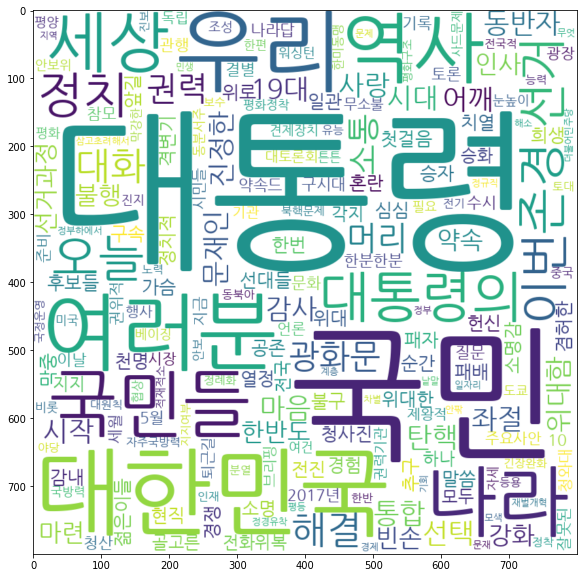

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
plt.imshow(array, interpolation="bilinear")
plt.show()
fig.savefig('wordcloud.png')

In [11]:
# 문재인대통령
count = Counter(word_list2)
wordcloud2 = wordcloud.generate_from_frequencies(count)
array2 = wordcloud2.to_array()

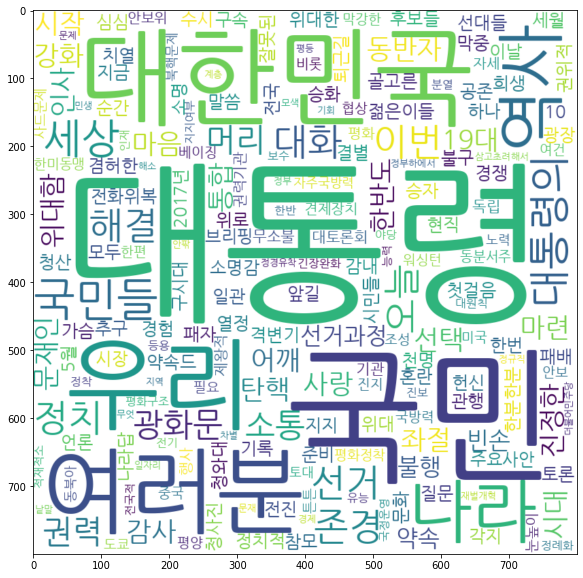

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
plt.imshow(array2, interpolation="bilinear")
plt.show()
fig.savefig('wordcloud2.png')